## K Means Clustering

In [1]:
#Import libraries
import pandas
import seaborn
import numpy
import scikitplot
from sklearn.cluster import KMeans,AgglomerativeClustering,SpectralClustering 
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8


In [22]:
#Hide all the warnings in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In this task we will use clustering_data_1.csv available in data folder

In [2]:
#Load the data 
clustering_data_1 = pandas.read_csv('./data/clustering_data_1.csv')

In [3]:
#Check the shape of the data
clustering_data_1.shape

(2000, 2)

In [4]:
#Check the head
clustering_data_1.head()

,X,Y
0,-8.659655,1.344655
1,-4.765612,-8.923286
2,-8.744243,-0.576567
3,1.805738,-13.008058
4,-4.798434,-8.945116


Data contains 2000 points with X and Y feature. We can plot this on 2D plane.

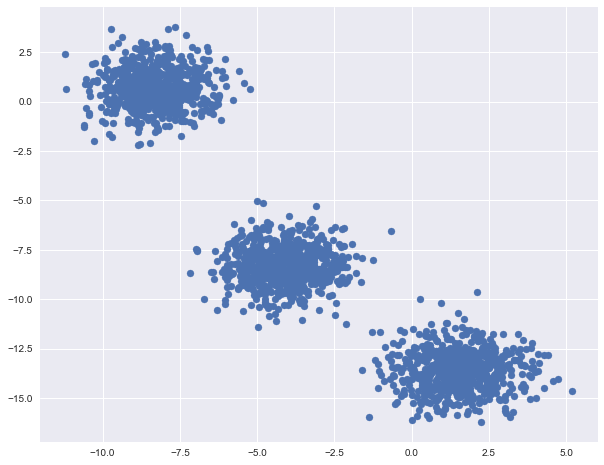

In [5]:
plt.scatter(clustering_data_1['X'],clustering_data_1['Y'])

From data we can see presence of tree clusters

In [6]:
#First create a KMeans clustering object and define number of cluster = 2
kmeans = KMeans(n_clusters=2)

In [7]:
kmeans.fit(clustering_data_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
#Get cluster assignment
cluster_assignment = kmeans.predict(clustering_data_1)

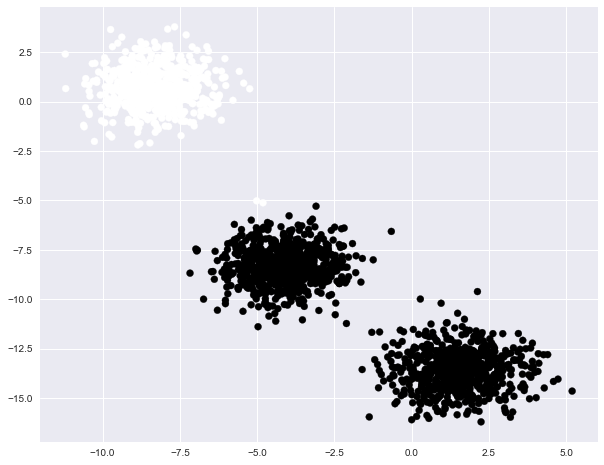

In [9]:
#Plot cluster
plt.scatter(clustering_data_1['X'],clustering_data_1['Y'],c=cluster_assignment)

Above clusters are not looking appropriate. It is clearly visible that there are three clusters. Now let's try the same algorithm with K=3.

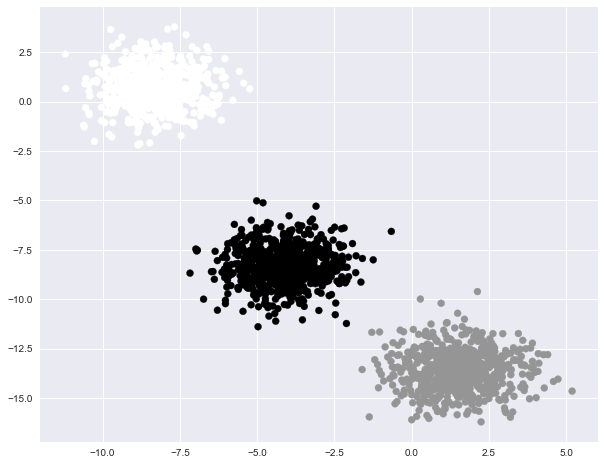

In [10]:
kmeans_3 = KMeans(n_clusters=3).fit(clustering_data_1)

#Get cluster assignment
cluster_assignment = kmeans_3.predict(clustering_data_1)

#Plot cluster
plt.scatter(clustering_data_1['X'],clustering_data_1['Y'],c=cluster_assignment)

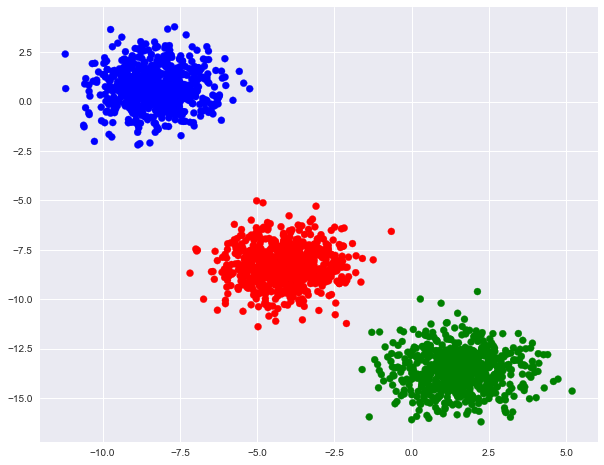

In [11]:
#To make the assignment colorful, change the cluster assignment points.
cluster_assignment = cluster_assignment.astype(str)
cluster_assignment[cluster_assignment == '0' ] = 'b'
cluster_assignment[cluster_assignment == '1' ] = 'g'
cluster_assignment[cluster_assignment == '2' ] = 'r'
plt.scatter(clustering_data_1['X'],clustering_data_1['Y'],c=cluster_assignment)

This is great. We can see three different clusters and our KMeans algorithm found that correctly. 

If we don't know what should be the correct value of K. scikitplot has a method to check the errors with number of cluster.

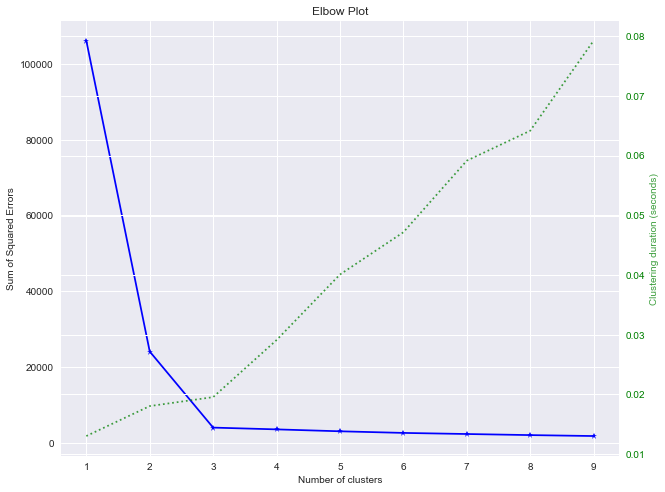

In [31]:
kmeans_elbow_check = KMeans()
scikitplot.cluster.plot_elbow_curve(kmeans_elbow_check,X=clustering_data_1, cluster_ranges=range(1, 10))

We can see that elbow is coming at 3. So 3 is the correct choice for number of clusters.

In [51]:
#Load another data
clustering_data_2 = pandas.read_csv('./data/clustering_data_2.csv')

In [52]:
clustering_data_2.head()

,X,Y
0,-0.472231,0.036999
1,-0.160415,-0.448140
2,-0.521661,0.904800
3,-0.986056,-0.347668
4,-0.068556,0.986253


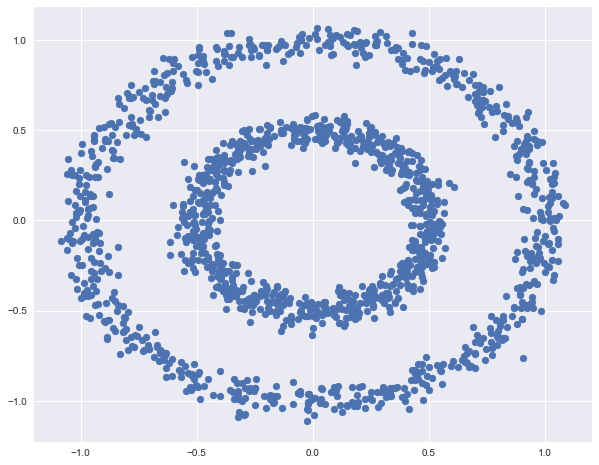

In [53]:
plt.scatter(clustering_data_2['X'],clustering_data_2['Y'])

This is an interesting data. Let's apply KMeans clustering algorithm on it. We can see data is clustered in two group. One is inner circle and other is outer circle.

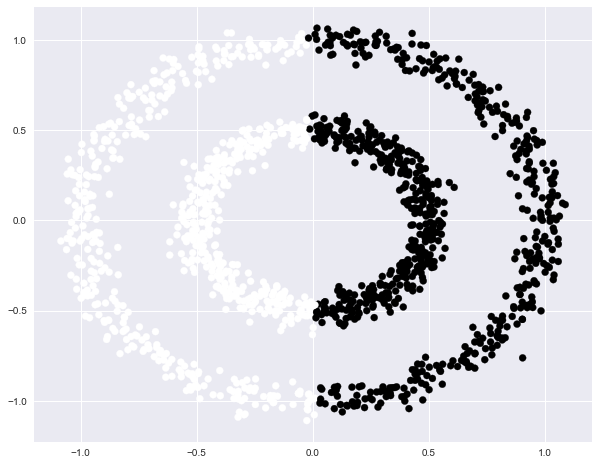

In [54]:
#First create a KMeans clustering object and define number of cluster = 2
kmeans_2 = KMeans(n_clusters=2).fit(clustering_data_2)

#Get cluster assignment
cluster_assignment = kmeans_2.predict(clustering_data_2)

#Plot cluster
plt.scatter(clustering_data_2['X'],clustering_data_2['Y'],c=cluster_assignment)

That is not something we want. Let's increase number of clusters.

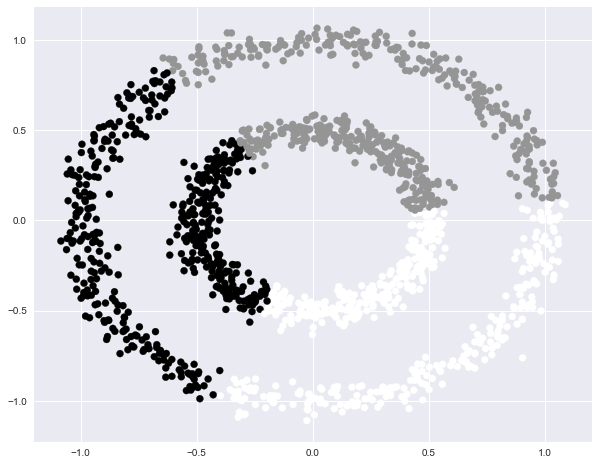

In [55]:
#First create a KMeans clustering object and define number of cluster = 2
kmeans_2 = KMeans(n_clusters=3).fit(clustering_data_2)
cluster_assignment = kmeans_2.predict(clustering_data_2)
plt.scatter(clustering_data_2['X'],clustering_data_2['Y'],c=cluster_assignment)

This is the limitation of this algorithm. It cannot find correct pattern in the above data.

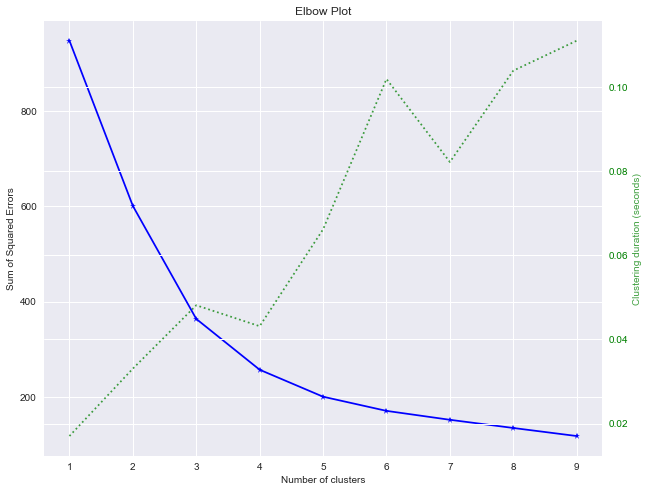

In [56]:
#Try elbow method
kmeans_elbow_check = KMeans()
scikitplot.cluster.plot_elbow_curve(kmeans_elbow_check,X=clustering_data_2, cluster_ranges=range(1, 10))

## Hierarchical Clustering

We used K Means clustering and it is not giving correct clusters. Let's try our next algorithm hierarchical clustering to get the clusters. We will use nearest linkage in this.

In [70]:
#Create object of hierarchical clustering
hierarchical_clustering = SpectralClustering(n_clusters=3, affinity="nearest_neighbors")

In [71]:
#Fit clustering model
hierarchical_clustering.fit(clustering_data_1)

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
          coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=3, n_init=10, n_jobs=1,
          n_neighbors=10, random_state=None)

In [72]:
#Assign cluster labels
cluster_assignment = hierarchical_clustering.labels_

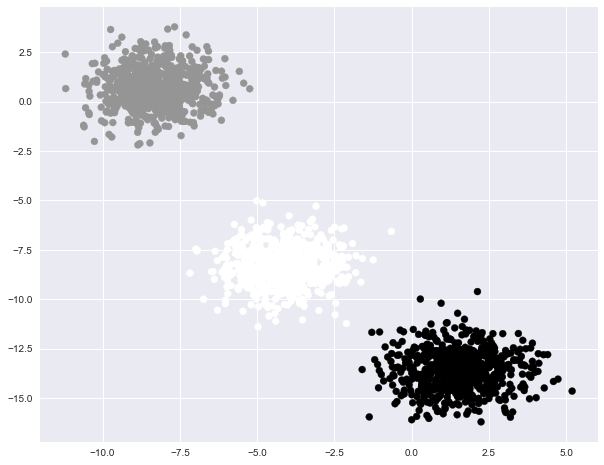

In [73]:
#Plot clusters
plt.scatter(clustering_data_1['X'],clustering_data_1['Y'],c=cluster_assignment)

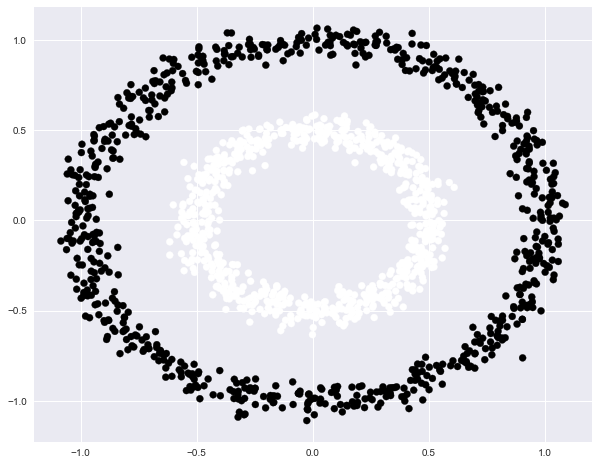

In [74]:
# Hierarchichal clustering on clustering_data_2
hierarchical_clustering = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
hierarchical_clustering.fit(clustering_data_2)
cluster_assignment = hierarchical_clustering.labels_
plt.scatter(clustering_data_2['X'],clustering_data_2['Y'],c=cluster_assignment)

Hierarchical clustering performs better in these types of data compare to K Means clustering. Let's do the experiment on another data.

In [76]:
#Load another data
clustering_data_3 = pandas.read_csv('./data/clustering_data_3.csv')

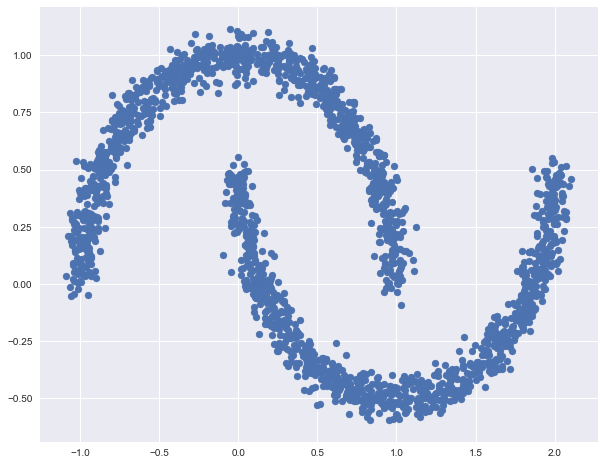

In [77]:
#Visualize the data
plt.scatter(clustering_data_3['X'],clustering_data_3['Y'])

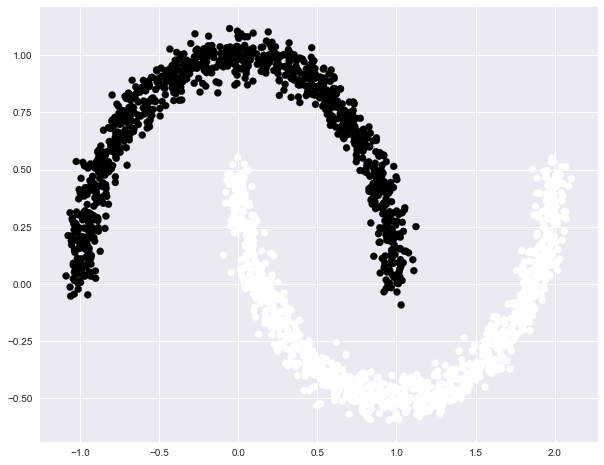

In [78]:
#Apply Hierarchichal clustering
hierarchical_clustering = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
hierarchical_clustering.fit(clustering_data_3)
cluster_assignment = hierarchical_clustering.labels_
plt.scatter(clustering_data_3['X'],clustering_data_3['Y'],c=cluster_assignment)

Hierarchichal clustering perform better in these type of data compare to K Means clustering.